# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Paul Braun

Datum: 18.11.2023

Gruppe: 18

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie gut kanne die theoretische Formel mit Messungen bestätigt werden?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

In einem Glas ist heißer Tee eingefüllt und ein Temperatursensor. Der andere Temperatursensor liegt mit etwas abstand daneben.


<img src="figures/Bild_newton.jpg" width="900">

## Versuchsauswertung

In [28]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py as h5 
import json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [24]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path_hdf = "data/data_newton/data_newton.h5"

# DONE #

In [52]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
#data_newton.h->RawData->uuidsensoren_>temperature&timestamp
path1 = "datasheets/sensor_1.json"
with open(path1) as json_file:
        sensor1 = json.load(json_file)

uuid1 = sensor1["JSON"]["ID"]

path2 = "datasheets/sensor_2.json"
with open(path2) as json_file:
        sensor1 = json.load(json_file)

uuid2 = sensor1["JSON"]["ID"]

with h5.File(path_hdf) as f: 
    time1 = f["RawData"][uuid1]["timestamp"][()]
    temp1 = f["RawData"][uuid1]["temperature"][()]
    temp2 = f["RawData"][uuid2]["temperature"][()]
f.close
time = time1 - min(time1)
# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

Text(0, 0.5, 'Temperatur log [°C]')

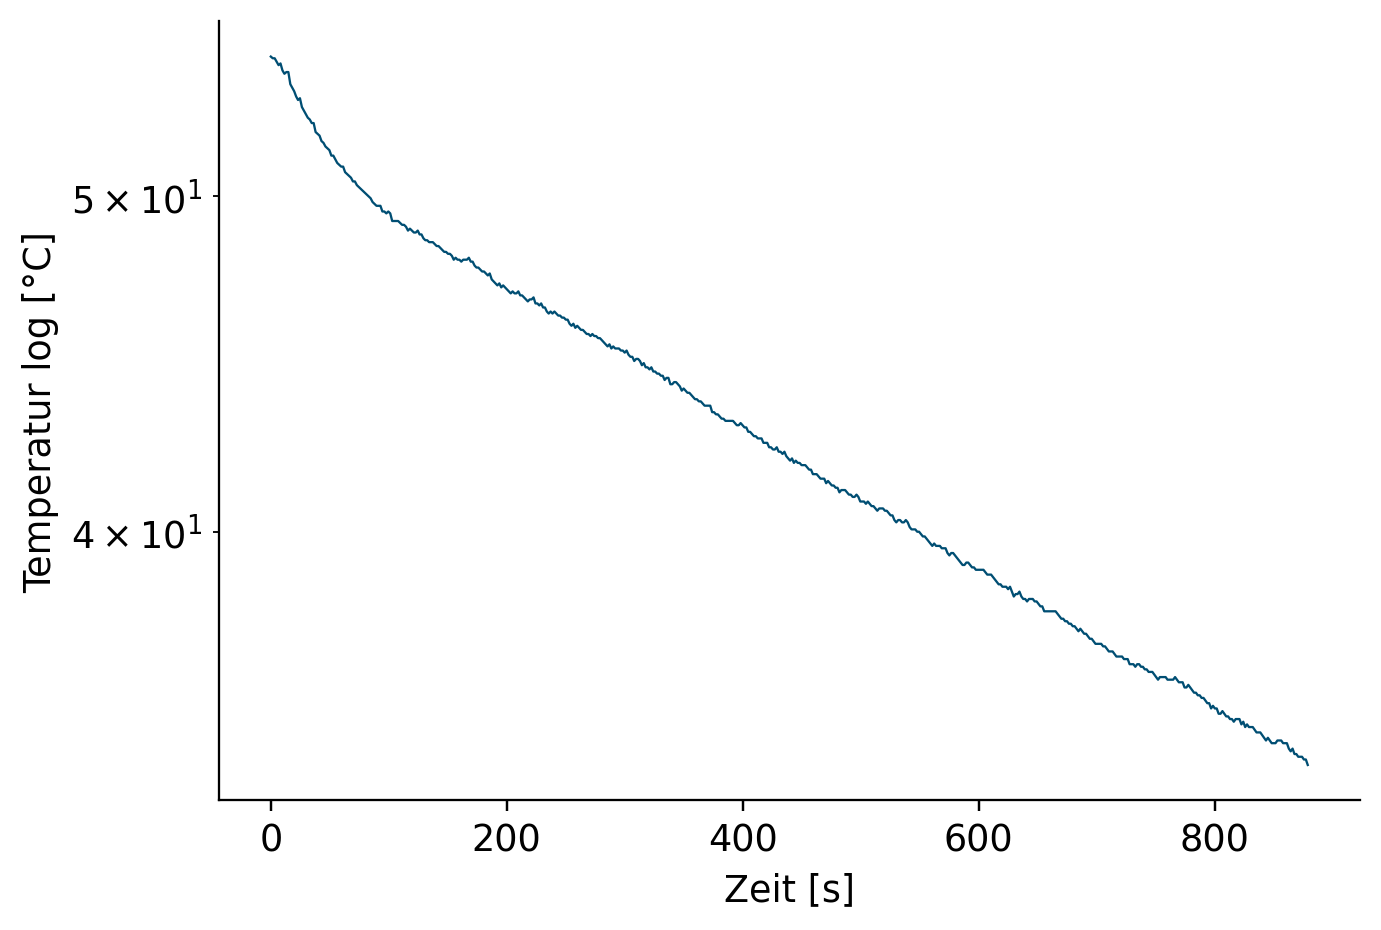

In [44]:
# TODO: Use the temperature and time data for plotting
tempd = temp2 - temp1
x = time
y = tempd
plt.plot(x,y)
plt.semilogy()
plt.xlabel("Zeit [s]")
plt.ylabel("Temperatur log [°C]")

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

$$
Kt =ln(\frac{T(t)-T_2}{T_1 - T_2})
$$

In [94]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
T_1 = max(temp2)
T_2 = temp2[-1]
T_diff = temp2 - T_2
t = time
#print(T_t)
inlog1 = (T_diff)/(T_1-T_2)
#print(inlog1)
x = [t[i] for i,it in enumerate(inlog1) if it > 0]
inlog =  [i for i in inlog1 if i !=0] #Nullstellen aus inlog1 entfernen und zugehörige time werte
y = np.log(inlog)

p = np.polyfit( x , y , deg = 1 , rcond = None , full = False, w = None, cov = False)
K = p[0]
# DONE #

#### (iV) Ergebnis

In [95]:
# TODO: Print result
print(K)

# DONE #

-0.0037419420370528532


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

WIe zu erwarten kann innerhalb von Messunsicherheiten das Newtonsche Abkühlungsgesetz bestätigt werden.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

-Ich habe gelernt wie wichtig ein Überprüfen vor Messungen ist um gute Messungen zu tätigen und die Ergebnisse zu speichern. 